<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/HW3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
# import diabetes.csv from the Drive
file_path = '/content/drive/My Drive/ML/HW3/diabetes.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [209]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:, 8].values

In [210]:
X[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [211]:
#split our Data set into Training Data(0.8) and Test Data(0.2). Training data will be used to train our
#Logistic model and Test data will be used to validate our model.
#Sklearn is used to split our data. We’ll import  train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify =Y)

In [212]:
#Now feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and EstimatedSalay.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [213]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver= 'liblinear', penalty="l2", C=1.0, random_state=0, max_iter=1000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [214]:
Y_pred = classifier.predict(X_test)

In [215]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[89, 11],
       [23, 31]])

In [216]:
#Evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7380952380952381
Recall: 0.5740740740740741
F1 Score: 0.6458333333333334


Text(0.5, 427.9555555555555, 'Predicted label')

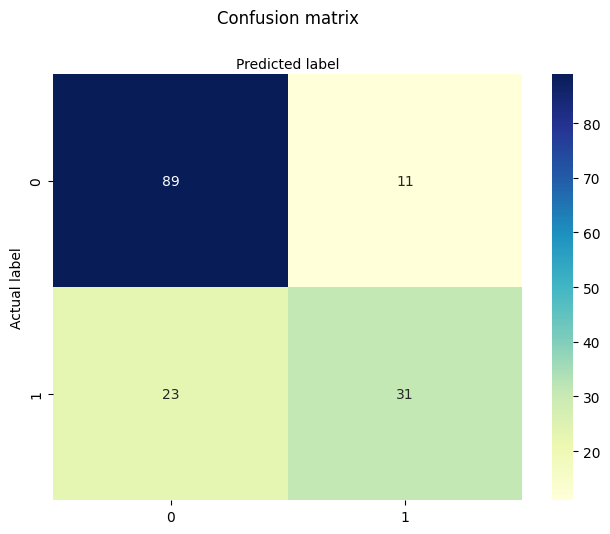

In [217]:
#Visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

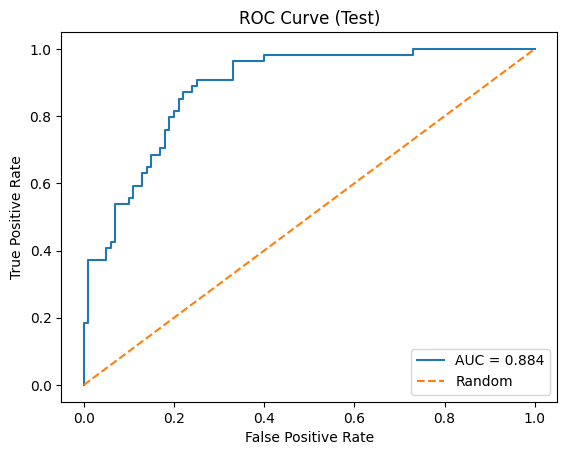

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC for the liblinear LogisticRegression classifier
y_score_lr = classifier.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_score_lr)
auc_lr = roc_auc_score(Y_test, y_score_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}")
plt.plot([0,1], [0,1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend(loc="lower right")
plt.show()

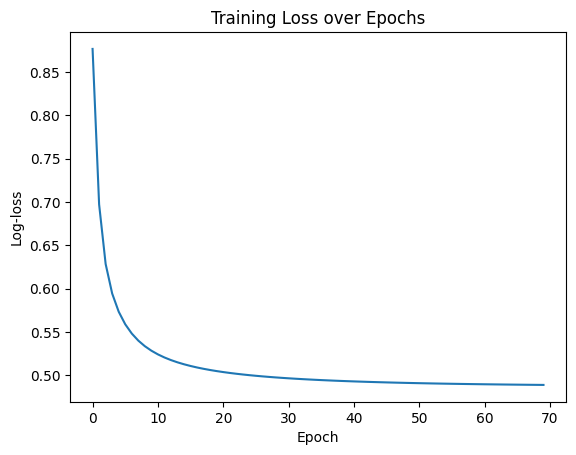

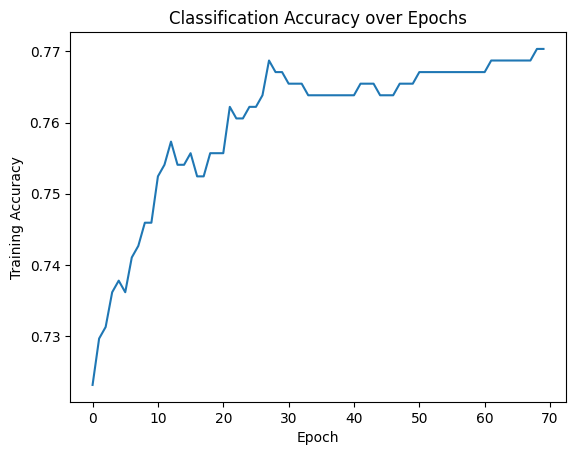

In [219]:
# Loss and Training accuracy
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

classes = np.array([0, 1])
sgd = SGDClassifier(
    loss="log_loss", penalty="l2", alpha=1.0/len(X_train), # alpha ≈ 1 / (C * X_train), to match with liblinear regularization
    learning_rate="optimal", random_state=0
)
EPOCHS = 70
loss_hist = []
acc_hist  = []

sgd.partial_fit(X_train, Y_train, classes=classes)

for epoch in range(EPOCHS):
    sgd.partial_fit(X_train, Y_train)
    p_train = sgd.predict_proba(X_train)[:, 1]
    yhat_tr = (p_train >= 0.5).astype(int)
    loss_hist.append(log_loss(Y_train, p_train, labels=classes))
    acc_hist.append((yhat_tr == Y_train).mean())

plt.figure()
plt.plot(loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Log-loss")
plt.title("Training Loss over Epochs")
plt.show()

plt.figure()
plt.plot(acc_hist)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Classification Accuracy over Epochs")
plt.show()